<a id="toc"></a>

# <u>Table of Contents</u>
1.) [Imports](#imports)  
2.) [Load data](#load)  
3.) [Quick Overview](#overview)  
&nbsp;&nbsp;&nbsp;&nbsp; 3.1.) [Missing Values](#nan)  
&nbsp;&nbsp;&nbsp;&nbsp; 3.2.) [Correlation Map](#corr)  
4.) [Target variables](#target)  
&nbsp;&nbsp;&nbsp;&nbsp; 4.1.) [Formation Energy EV natom](#target_1)  
&nbsp;&nbsp;&nbsp;&nbsp; 4.2.) [Bandgap Energy EV](#target_2)   
5.) [Numerical columns](#num)  
6.) [Feature Importance](#feat_importance)  

---
<a id="imports"></a>

# [^](#toc) <u>Imports</u>

In [1]:
### Standard imports
import pandas as pd
import numpy as np

# Plotting imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

# Time keeper
import time

# Datetime library
from datetime import datetime

### Removes warnings from output
import warnings
warnings.filterwarnings('ignore')

### Styling helpers

In [23]:
# A short hand way to plot most bar graphs
def pretty_bar(data, xlabel=None, ylabel=None, title=None, int_text=False):
    
    # Plots the data
    fig = sns.barplot(data.values, data.index)
    
    # Places text for each value in data
    for i, v in enumerate(data.values):
        
        # Decides whether the text should be rounded or left as floats
        if int_text:
            plt.text(0, i, int(v), color='k', fontsize=14)
        else:
            plt.text(0, i, round(v, 3), color='k', fontsize=14)
     
    ### Labels plot
    ylabel != None and fig.set(ylabel=ylabel)
    xlabel != None and fig.set(xlabel=xlabel)
    title != None and fig.set(title=title)

    
### Used to style Python print statements
class color:
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'

---
<a id="load"></a>

# [^](#toc) <u>Load data</u>

In [5]:
DATA_PATH = "../../data/semiconductors/"

# Load data
train = pd.read_csv(DATA_PATH + "train.csv")
test  = pd.read_csv(DATA_PATH + "test.csv")

print("Shape of train data:", train.shape, "\n")
print("Shape of test data:" , test.shape,  "\n")

### Categorical columns
cat_columns = [col for col in train.columns if train[col].dtype == object]
print("{}Categorical columns:{}".format(color.UNDERLINE, color.END))
print(" --- ".join(cat_columns))

### Numerical columns
num_columns = [col for col in train.columns if train[col].dtype != object]
print("{}Numerical columns:{}".format(color.UNDERLINE, color.END))
print(" --- ".join(num_columns))

train.head()

Shape of train data: (2400, 14) 

Shape of test data: (600, 12) 

Categorical columns:

Numerical columns:
id --- spacegroup --- number_of_total_atoms --- percent_atom_al --- percent_atom_ga --- percent_atom_in --- lattice_vector_1_ang --- lattice_vector_2_ang --- lattice_vector_3_ang --- lattice_angle_alpha_degree --- lattice_angle_beta_degree --- lattice_angle_gamma_degree --- formation_energy_ev_natom --- bandgap_energy_ev


,id,spacegroup,number_of_total_atoms,percent_atom_al,percent_atom_ga,percent_atom_in,lattice_vector_1_ang,lattice_vector_2_ang,lattice_vector_3_ang,lattice_angle_alpha_degree,lattice_angle_beta_degree,lattice_angle_gamma_degree,formation_energy_ev_natom,bandgap_energy_ev
0,1,33,80.0,0.6250,0.3750,0.000,9.9523,8.5513,9.1775,90.0026,90.0023,90.0017,0.0680,3.4387
1,2,194,80.0,0.6250,0.3750,0.000,6.1840,6.1838,23.6287,90.0186,89.9980,120.0025,0.2490,2.9210
2,3,227,40.0,0.8125,0.1875,0.000,9.7510,5.6595,13.9630,90.9688,91.1228,30.5185,0.1821,2.7438
3,4,167,30.0,0.7500,0.0000,0.250,5.0036,5.0034,13.5318,89.9888,90.0119,120.0017,0.2172,3.3492
4,5,194,80.0,0.0000,0.6250,0.375,6.6614,6.6612,24.5813,89.9960,90.0006,119.9893,0.0505,1.3793


In [6]:
test.head()

,id,spacegroup,number_of_total_atoms,percent_atom_al,percent_atom_ga,percent_atom_in,lattice_vector_1_ang,lattice_vector_2_ang,lattice_vector_3_ang,lattice_angle_alpha_degree,lattice_angle_beta_degree,lattice_angle_gamma_degree
0,1,33,80.0,0.1875,0.4688,0.3438,10.5381,9.0141,9.6361,89.9997,90.0003,90.0006
1,2,33,80.0,0.7500,0.2500,0.0000,9.8938,8.5014,9.1298,90.0038,90.0023,90.0015
2,3,167,30.0,0.6667,0.1667,0.1667,4.9811,4.9808,13.4799,89.9900,90.0109,120.0014
3,4,12,80.0,0.5625,0.4375,0.0000,24.3370,6.0091,5.7620,89.9995,103.8581,90.0002
4,5,12,80.0,0.1875,0.5000,0.3125,24.6443,6.2906,6.1589,90.0000,104.5929,90.0001


In [8]:
sample = pd.read_csv(DATA_PATH + "sample.csv")
sample.head()

,id,formation_energy_ev_natom,bandgap_energy_ev
0,1,0.1779,1.8892
1,2,0.1779,1.8892
2,3,0.1779,1.8892
3,4,0.1779,1.8892
4,5,0.1779,1.8892


---
<a id="overview"></a>

# [^](#toc) <u>Quick Overview</u>

### Split into id, target, and predictors

In [16]:
train_y  = train[["formation_energy_ev_natom", "bandgap_energy_ev"]]
train_x  = train.drop(["id", "formation_energy_ev_natom", "bandgap_energy_ev"], axis=1)

test_id  = test.id
test_x   = test.drop(["id"], axis=1)

full     = pd.concat([train_x, test_x])
train_N = len(train_x)

<a id="nan"></a>

### [^](#toc) Missing values

In [17]:
temp = full.isnull().sum()
temp[temp > 0]

Series([], dtype: int64)

<a id="corr"></a>

### [^](#toc) Correlation Map

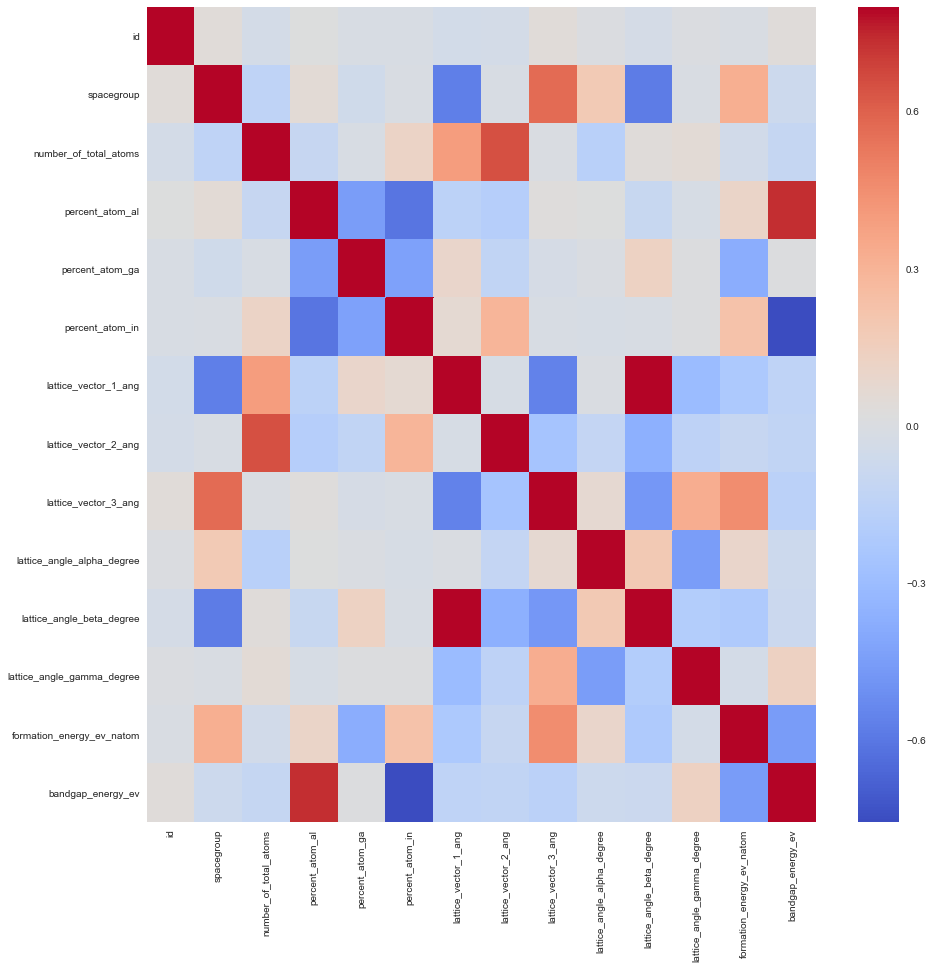

In [18]:
f, ax = plt.subplots(figsize=(15, 15))

cols = [col for col in train.columns if "_nan" not in col]
_ = sns.heatmap(train[cols].corr(), vmax=.8, cmap="coolwarm")

---
<a id="target"></a>

# [^](#toc) <u>Target variables</u>

<a id="target_1"></a>

### [^](#toc) Formation Energy EV natom

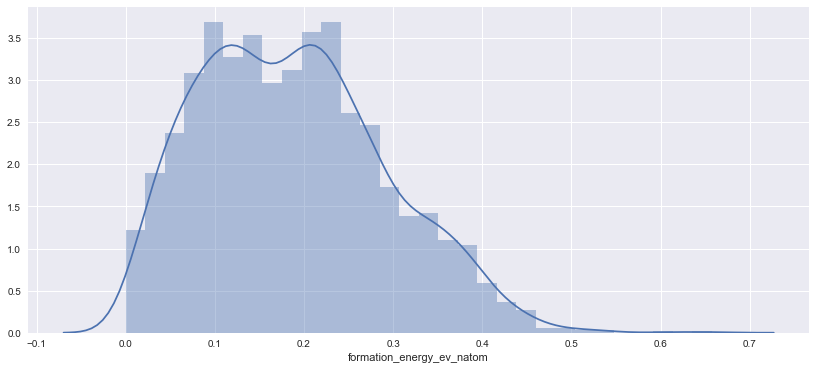

In [19]:
plt.figure(figsize=(14, 6))

_ = sns.distplot(train_y["formation_energy_ev_natom"])

<a id="target_2"></a>

### [^](#toc) Bandgap Energy EV

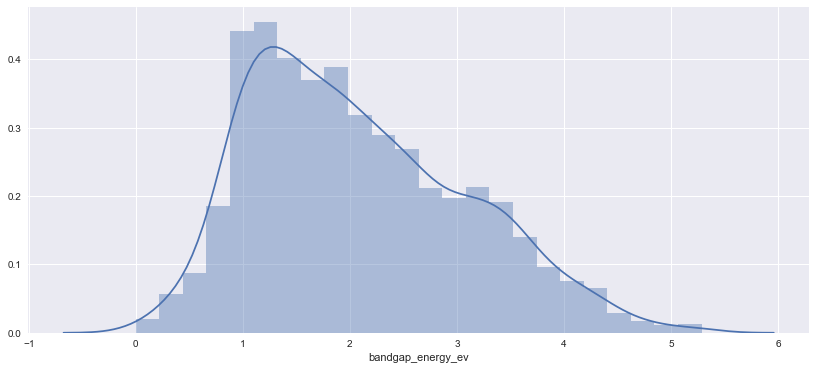

In [20]:
plt.figure(figsize=(14, 6))

_ = sns.distplot(train_y["bandgap_energy_ev"])

---
<a id="num"></a>

# [^](#toc) <u>Numerical columns</u>

spacegroup --- number_of_total_atoms --- percent_atom_al --- percent_atom_ga --- percent_atom_in --- lattice_vector_1_ang --- lattice_vector_2_ang --- lattice_vector_3_ang --- lattice_angle_alpha_degree --- lattice_angle_beta_degree --- lattice_angle_gamma_degree

### Spacegroup

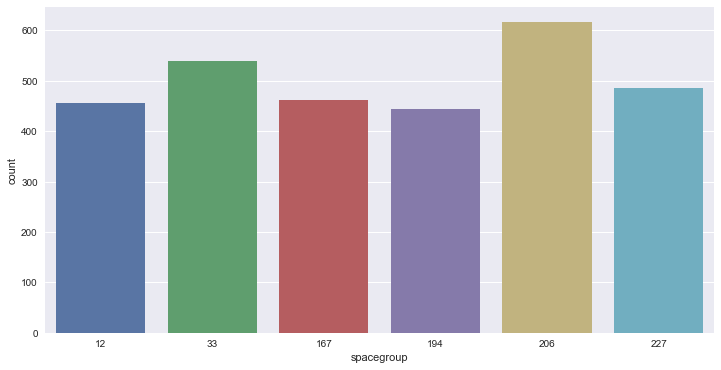

In [29]:
plt.figure(figsize=(12, 6))
_ = sns.countplot(full.spacegroup)

### Number of Total Atoms

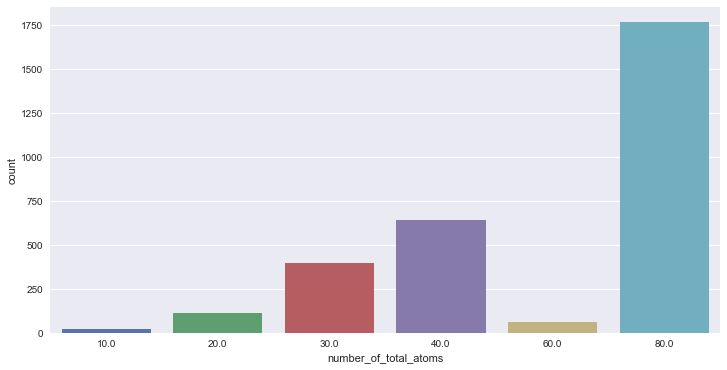

In [32]:
plt.figure(figsize=(12, 6))
_ = sns.countplot(full.number_of_total_atoms)



percent_atom_al --- percent_atom_ga --- percent_atom_in

In [ ]:
fig, axarr = plt.subplots(1, 3, figsize=(14, 8))

---
<a id="model"></a>

# [^](#toc) Modeling

<a id="ml_imports"></a>

### [^](#toc) Machine learning imports

In [23]:
# Massive amounts of model imports
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV, StratifiedKFold, learning_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Imputer
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

kfold = StratifiedKFold()

def score_model(model):
    score = cross_val_score(model, train_x, train_y, cv=kfold, n_jobs=1, scoring="accuracy")
    print(score)
    print("\nAverage is ...")
    print(sum(score) / len(score))

<a id="model_eval"></a>

### [^](#toc) Many model evaluation

This just gives an idea of what model will be the best performer.  However, this appears to be too computationally expensive for this amount of data.  If I had more time I would split up the data into smaller chunks, then evaluate this.

In [ ]:
# Modeling step Test differents algorithms 
classifiers = [
                AdaBoostClassifier(
                    DecisionTreeClassifier(random_state = 17),
                    random_state = 17, learning_rate = 0.1
                ),
                DecisionTreeClassifier(random_state = 17),
                ExtraTreesClassifier(random_state = 17),
                GradientBoostingClassifier(random_state=17),
    
                KNeighborsClassifier(),
                LGBMClassifier(),
                LinearDiscriminantAnalysis(),
                LogisticRegression(random_state = 17),
    
                MLPClassifier(random_state = 17),
                RandomForestClassifier(random_state = 17),
                SVC(random_state=17),
                XGBClassifier()
              ]

cv_results = [cross_val_score(classifier, train_x, y=train_y, scoring="accuracy", cv=kfold) for classifier in classifiers]

cv_means = [cv_result.mean() for cv_result in cv_results]
cv_std = [cv_result.std() for cv_result in cv_results]

cv_results = pd.DataFrame({
                        "CrossValMeans":cv_means,
                        "CrossValerrors": cv_std,
                        "Algorithm":[
                            "AdaBoost",
                            "DecisionTree",
                            "ExtraTrees",
                            "GradientBoosting",
                            
                            "KNeighboors",
                            "LGBM",
                            "LinearDiscriminantAnalysis",
                            "LogisticRegression",
                            
                            "MultipleLayerPerceptron",
                            "RandomForest",
                            "SVC",
                            "XGB"
                        ]})

sns.barplot("CrossValMeans","Algorithm", data=cv_results, palette="Set3", orient="h", **{'xerr':cv_std})
plt.xlabel("Mean Accuracy")
_ = plt.title("Cross validation scores")

<a id="ada_model"></a>

### [^](#toc) Ada Boost Classifier

In [ ]:
ada_model = AdaBoostClassifier(
                    DecisionTreeClassifier(random_state = 17),
                    random_state = 17, learning_rate = 0.1
                )

### Training
start = time.time()
ada_model.fit(train_x, train_y)
print("Training took {} seconds".format(round(time.time() - start)))

### Scoring
start = time.time()
score_model(ada_model)
print("\nScoring took {} seconds".format(round(time.time() - start)))

<a id="dtc_model"></a>

### [^](#toc) Deciscion Tree Classifier

In [ ]:
dtc_model = DecisionTreeClassifier(random_state = 17)

### Training
start = time.time()
dtc_model.fit(train_x, train_y)
print("Training took {} seconds".format(round(time.time() - start)))

### Scoring
start = time.time()
score_model(dtc_model)
print("\nScoring took {} seconds".format(round(time.time() - start)))

<a id="etc_model"></a>

### [^](#toc) Extra Trees Classifer

In [ ]:
etc_model = ExtraTreesClassifier(random_state = 17)

### Training
start = time.time()
etc_model.fit(train_x, train_y)
print("Training took {} seconds".format(round(time.time() - start)))

### Scoring
start = time.time()
score_model(etc_model)
print("\nScoring took {} seconds".format(round(time.time() - start)))

<a id="gbc_model"></a>

### [^](#toc) Gradient Boosting Classifier

In [ ]:
gbc_model = GradientBoostingClassifier(random_state=17)

### Training
start = time.time()
gbc_model.fit(train_x, train_y)
print("Training took {} seconds".format(round(time.time() - start)))

### Scoring
start = time.time()
score_model(gbc_model)
print("\nScoring took {} seconds".format(round(time.time() - start)))

<a id="knn_model"></a>

### [^](#toc) K Nearest Neighbors

In [ ]:
knn_model = KNeighborsClassifier()

### Training
start = time.time()
knn_model.fit(train_x, train_y)
print("Training took {} seconds".format(round(time.time() - start)))

### Scoring
start = time.time()
score_model(knn_model)
print("\nScoring took {} seconds".format(round(time.time() - start)))

<a id="lgb_model"></a>

### [^](#toc) Light Gradient Boost

In [2]:
lgb_model = LGBMClassifier()

### Training
start = time.time()
lgb_model.fit(train_x, train_y)
print("Training took {} seconds".format(round(time.time() - start)))

### Scoring
start = time.time()
score_model(lgb_model)
print("\nScoring took {} seconds".format(round(time.time() - start)))

<a id="lin_model"></a>

### [^](#toc) Linear Discriminant Analysis

In [1]:
lin_model = LinearDiscriminantAnalysis()

### Training
start = time.time()
lin_model.fit(train_x, train_y)
print("Training took {} seconds".format(round(time.time() - start)))

### Scoring
start = time.time()
score_model(lin_model)
print("\nScoring took {} seconds".format(round(time.time() - start)))

<a id="log_model"></a>

### [^](#toc) Logistic

In [ ]:
log_model = LogisticRegression(random_state = 17)

### Training
start = time.time()
log_model.fit(train_x, train_y)
print("Training took {} seconds".format(round(time.time() - start)))

### Scoring
start = time.time()
score_model(log_model)
print("\nScoring took {} seconds".format(round(time.time() - start)))

<a id="mlp_model"></a>

### [^](#toc) Multiple Layer Perceptron

In [ ]:
mlp_model = MLPClassifier(random_state = 17)

### Training
start = time.time()
mlp_model.fit(train_x, train_y)
print("Training took {} seconds".format(round(time.time() - start)))

### Scoring
start = time.time()
mlp_model(lin_model)
print("\nScoring took {} seconds".format(round(time.time() - start)))

<a id="rfc_model"></a>

### [^](#toc) Random Forest Classifier

In [ ]:
rfc_model = RandomForestClassifier(random_state = 17)

### Training
start = time.time()
rfc_model.fit(train_x, train_y)
print("Training took {} seconds".format(round(time.time() - start)))

### Scoring
start = time.time()
score_model(rfc_model)
print("\nScoring took {} seconds".format(round(time.time() - start)))

<a id="svc_model"></a>

### [^](#toc) SVC

In [ ]:
svc_model = SVC()

### Training
start = time.time()
svc_model.fit(train_x, train_y)
print("Training took {} seconds".format(round(time.time() - start)))

### Scoring
start = time.time()
score_model(svc_model)
print("\nScoring took {} seconds".format(round(time.time() - start)))

<a id="xgb_model"></a>

### [^](#toc) XGB Classifier

In [ ]:
xgb_model = XGBClassifier()

### Training
start = time.time()
xgb_model.fit(train_x, train_y)
print("Training took {} seconds".format(round(time.time() - start)))

### Scoring
start = time.time()
score_model(xgb_model)
print("\nScoring took {} seconds".format(round(time.time() - start)))

<a id="vote"></a>

### [^](#toc) Voting classifier

In [ ]:
print("Building...")
final_model = VotingClassifier(estimators=[
                                        ("ADA", ada_model),
                                        ("DTC", dtc_model),
                                        ("ETC", etc_model),
                                        ("GBC", gbc_model),
                                        ("KNN", knn_model),
                                        ("LGB", lgb_model),
                                        ("LIN", lin_model),
                                        ("LOG", log_model),
                                        ("MLP", mlp_model),
                                        ("RFC", rfc_model),
                                        ("SVC", svc_model),
                                        ("XGB", xgb_model)
                                      ], voting='soft')
print("Built.")

### Training
start = time.time()
final_model.fit(train_x, train_y)
print("Training took {} seconds".format(round(time.time() - start)))

### Scoring
start = time.time()
score_model(final_model)
print("\nScoring took {} seconds".format(round(time.time() - start)))

---
<a id="feat_importance"></a>

# [^](#toc) <u>Feature Importance</u>

Runs an Extra Trees Classifier on a sample of the data and determines the data's most important features.

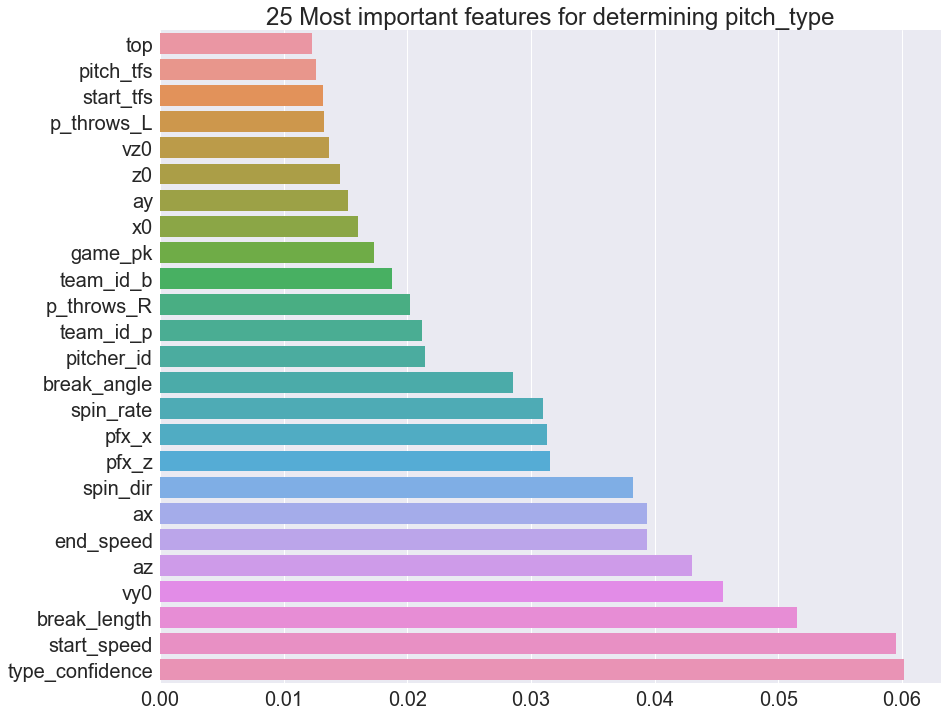

In [38]:
# Setup Extra Trees model
et_model = ExtraTreesClassifier()
et_model.fit(train_x[:10000], train_y[:10000])

# Get important features
x, y = (list(x) for x in zip(*sorted(zip(et_model.feature_importances_, train_x.columns), 
                                                            reverse = False)))

### Styling
sns.set(font_scale=2)
plt.figure(figsize=(14, 12))
plt.title("25 Most important features for model")

# Plot important features
_ = sns.barplot(x[-25:], y[-25:])